In [2]:
import numpy as np
import torch

In [3]:
torch.cuda.is_available()

True

In [4]:
torch.cuda.device_count()

1

In [5]:
X_train = np.array(object = [i for i in range(0,11)])
X_train

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [6]:
X_train = X_train.reshape((-1,1))

In [7]:
X_train

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [8]:
y_train = 2 * X_train + 1

In [9]:
y_train

array([[ 1],
       [ 3],
       [ 5],
       [ 7],
       [ 9],
       [11],
       [13],
       [15],
       [17],
       [19],
       [21]])

In [10]:
import torch.nn as nn
from torch.autograd import Variable

In [925]:
torch.set_default_tensor_type('torch.FloatTensor')

In [11]:
#Creating class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim , output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [12]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)
model.cuda()

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [13]:
criterion = nn.MSELoss()

In [14]:
learning_rate = 0.01

In [15]:
# Here SGD : Stochastic Gradient Descent
optimizer = torch.optim.SGD(params=model.parameters(),lr=learning_rate)

In [16]:
epochs = 100

In [17]:
torch.cuda.is_available()

True

In [18]:
X = torch.from_numpy(X_train).cuda()

In [19]:
torch.backends.cudnn.benchmark = True

for epoch in range(epochs):
    epoch +=1
    inputs = Variable(torch.from_numpy(X_train).float()).cuda()
    labels = Variable(torch.from_numpy(y_train).float()).cuda()
    
    # Clear Gradients w.r.t. parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    print("Epoch : {}, loss : {}".format(epoch, loss))

Epoch : 1, loss : 141.16270446777344
Epoch : 2, loss : 11.519604682922363
Epoch : 3, loss : 0.9449634552001953
Epoch : 4, loss : 0.08236332982778549
Epoch : 5, loss : 0.01194512564688921
Epoch : 6, loss : 0.006142882630228996
Epoch : 7, loss : 0.005611904431134462
Epoch : 8, loss : 0.005511539522558451
Epoch : 9, loss : 0.00544691039249301
Epoch : 10, loss : 0.0053858403116464615
Epoch : 11, loss : 0.005325671751052141
Epoch : 12, loss : 0.005266213323920965
Epoch : 13, loss : 0.005207390990108252
Epoch : 14, loss : 0.005149213131517172
Epoch : 15, loss : 0.005091734230518341
Epoch : 16, loss : 0.005034853704273701
Epoch : 17, loss : 0.004978660494089127
Epoch : 18, loss : 0.004923040047287941
Epoch : 19, loss : 0.004868074785917997
Epoch : 20, loss : 0.004813723266124725
Epoch : 21, loss : 0.004759958945214748
Epoch : 22, loss : 0.004706819541752338
Epoch : 23, loss : 0.004654255695641041
Epoch : 24, loss : 0.004602288361638784
Epoch : 25, loss : 0.004550900310277939
Epoch : 26, loss 

In [935]:
inputs = Variable(torch.from_numpy(X_train))
labels = Variable(torch.from_numpy(y_train))

In [936]:
loss

tensor(0.0039, device='cuda:0', grad_fn=<MseLossBackward>)

In [937]:
loss.item()

0.003880455857142806

In [938]:
outputs

tensor([[ 1.1165],
        [ 3.0997],
        [ 5.0830],
        [ 7.0662],
        [ 9.0494],
        [11.0326],
        [13.0158],
        [14.9991],
        [16.9823],
        [18.9655],
        [20.9487]], device='cuda:0', grad_fn=<AddmmBackward>)

In [939]:
predicted = model(Variable(torch.from_numpy(X_train).float().cuda())).data.cpu().numpy()

In [940]:
predicted

array([[ 1.1158781],
       [ 3.0991907],
       [ 5.0825033],
       [ 7.0658154],
       [ 9.049128 ],
       [11.03244  ],
       [13.015753 ],
       [14.999065 ],
       [16.982378 ],
       [18.96569  ],
       [20.949003 ]], dtype=float32)

In [941]:
import matplotlib.pyplot as plt

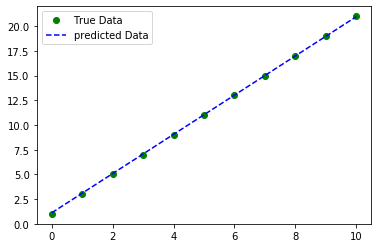

In [947]:
# Clear Figure
plt.clf()

# Get Predictions
y_pred = model(Variable(torch.from_numpy(X_train).float().cuda())).data.cpu().numpy()

#Plot true data 
plt.plot(X_train, y_train, 'go', label = 'True Data', alpha = 1)

#Plot predicted data 
plt.plot(X_train, y_pred, 'b--', label = 'predicted Data', alpha = 1)

# Legend and plot
plt.legend(loc = 'best')
plt.show()